# Neural Networks in Keras

In [ ]:
!conda install tensorflow



In [1]:
'''
Import module
'''
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
%matplotlib inline

Using TensorFlow backend.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\rapho\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\rapho\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\rapho\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\rapho\Anaconda3\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\rapho\Anaconda3\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: Le module spécifié est introuvable.

During handling of the above exception, another exception occurred:

Traceback (most recent call last

TypeError: can only concatenate str (not "list") to str

In [2]:
'''
Load dataset
'''
from keras.datasets import mnist

(train_features, train_labels), (test_features, test_labels) = mnist.load_data()
_, img_rows, img_cols =  train_features.shape
num_classes = len(np.unique(train_labels))
num_input_nodes = img_rows*img_cols

print("Number of training samples: %d"%train_features.shape[0])
print("Number of test samples: %d"%test_features.shape[0])
print("Image rows: %d"%train_features.shape[1])
print("Image columns: %d"%train_features.shape[2])
print("Number of classes: %d"%num_classes)

Number of training samples: 60000
Number of test samples: 10000
Image rows: 28
Image columns: 28
Number of classes: 10


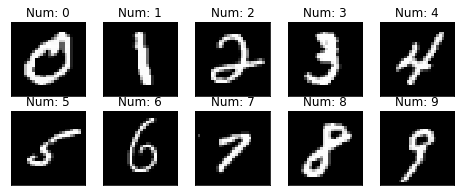

In [3]:
'''
Show Examples from Each Class
'''
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    features_idx = train_features[train_labels[:]==i,:]
    ax.set_title("Num: " + str(i))
    plt.imshow(features_idx[1], cmap="gray")
plt.show()

In [4]:
'''
Pre-processing
'''
# reshape images to column vectors
train_features = train_features.reshape(train_features.shape[0], img_rows*img_cols)
test_features = test_features.reshape(test_features.shape[0], img_rows*img_cols)
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [5]:
'''
Define a Neural Network Model with a Single Hidden Layer
'''
def simple_nn():
    # initialize model
    model = Sequential()
    # add an input layer and a hidden layer
    model.add(Dense(100, input_dim = num_input_nodes))
    # add activation layer to add non-linearity
    model.add(Activation('sigmoid'))
    # to add ReLu instead of sigmoid: model.add(Activation('relu'))
    # combine above 2 layers: model.add(Dense(100, input_dim=784),Activation('sigmoid'))
    # add output layer
    model.add(Dense(num_classes))
    # add softmax layer 
    model.add(Activation('softmax'))
    return model

# define model
model_sgd = simple_nn()
# define optimizer
sgd = SGD(lr=0.01)
model_sgd.compile(optimizer=sgd, loss='mse', metrics=['acc'])
# print model information
model_sgd.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [6]:
'''
Train the model
'''
%time model_info_sgd = model_sgd.fit(train_features, train_labels, batch_size=64, \
                       epochs=10, verbose=0, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
CPU times: user 18.3 s, sys: 2.85 s, total: 21.1 s
Wall time: 7.49 s


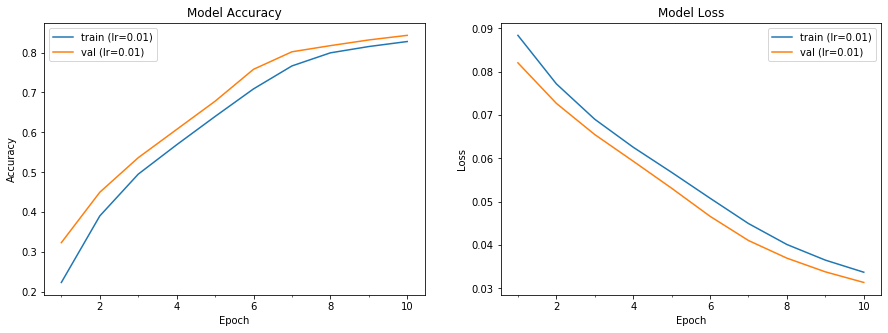

In [7]:
'''
Plot Accuracy or Loss as a Function of Number of Epoch
'''
def plot_model_history(models_histories, legends):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    txt = []
    for model_history, legend in zip(models_histories, legends):
        axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
        axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
        txt += ['train ('+legend+')', 'val ('+legend+')']
    axs[0].legend(txt, loc='best')
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    # summarize history for loss
    txt = []
    for model_history, legend in zip(models_histories, legends):
        axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
        axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
        txt += ['train ('+legend+')', 'val ('+legend+')']
    axs[1].legend(txt, loc='best')
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    plt.show()
    
plot_model_history([model_info_sgd], ["lr=0.01"])

In [8]:
'''
Test the model
'''
def accuracy(test_x, test_y, models, legends):
    for model, legend in zip(models, legends):
        result = model.predict(test_x)
        predicted_class = np.argmax(result, axis=1)
        true_class = np.argmax(test_y, axis=1)
        num_correct = np.sum(predicted_class == true_class) 
        accuracy = num_correct/result.shape[0]
        print("Accuracy on test data is: %0.2f"%accuracy, "("+legend+")")
    return

accuracy(test_features, test_labels, [model_sgd], ["lr=0.01"])

Accuracy on test data is: 0.84 (lr=0.01)


## Evolves learning rate

Fit with lr=0.001
CPU times: user 19 s, sys: 2.98 s, total: 22 s
Wall time: 8.26 s

Fit with lr=0.1
CPU times: user 18.6 s, sys: 2.91 s, total: 21.5 s
Wall time: 7.71 s


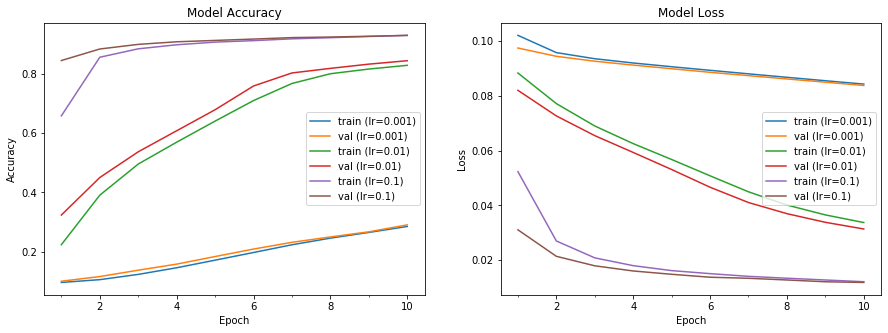

Accuracy on test data is: 0.30 (lr=0.001)
Accuracy on test data is: 0.84 (lr=0.01)
Accuracy on test data is: 0.93 (lr=0.1)


In [9]:
'''
Let's make the learning rate evolve
'''
# decrease the learning rate
# define model
model_d = simple_nn()
# define optimizer
sgd = SGD(lr=0.001)
model_d.compile(optimizer=sgd, loss='mse', metrics=['acc'])
# train the model
print("Fit with lr=0.001")
%time model_info_decrease = model_d.fit(train_features, train_labels, batch_size=64, \
                       epochs=10, verbose=0, validation_split=0.2)

# increase the learning rate
# define model
model_i = simple_nn()
# define optimizer
sgd = SGD(lr=0.1)
model_i.compile(optimizer=sgd, loss='mse', metrics=['acc'])
# train the model
print("\nFit with lr=0.1")
%time model_info_increase = model_i.fit(train_features, train_labels, batch_size=64, \
                       epochs=10, verbose=0, validation_split=0.2)

# plot model history
plot_model_history([model_info_decrease, model_info_sgd , model_info_increase], ["lr=0.001", "lr=0.01", "lr=0.1"])

# compute test accuracy
accuracy(test_features, test_labels, [model_d, model_sgd, model_i], ["lr=0.001", "lr=0.01", "lr=0.1"])

### Observation:

If the learning rate is decreased, less information is learned in each epoch and more epochs are required to learn a good model. If the learning rate is increased, more information is learned in each epoch and less epochs are required to learn a good model. When using SGD, learning rate needs to be decided emperically for a given dataset.

## Change optimizer

CPU times: user 25.6 s, sys: 5.25 s, total: 30.9 s
Wall time: 10.4 s


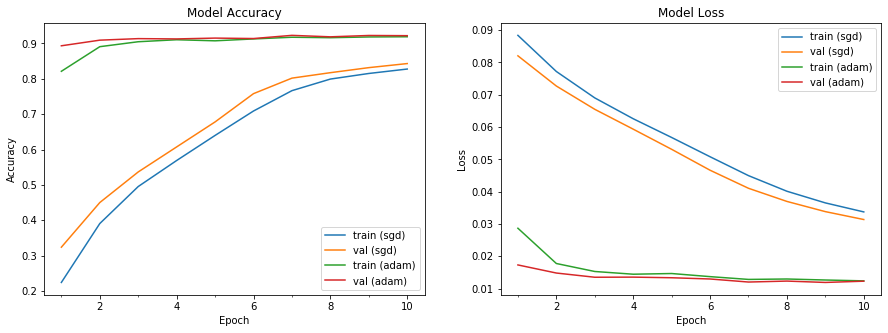

Accuracy on test data is: 0.84 (sgd)
Accuracy on test data is: 0.92 (adam)


In [10]:
'''
Use Adam optimizer instead of SGD
'''
# Define model
model_adam = simple_nn()
# define optimizer, loss function
model_adam.compile(optimizer='adam', loss='mse', metrics=['acc'])
# Train the model
%time model_info_adam = model_adam.fit(train_features, train_labels, batch_size=64, \
                       epochs=10, verbose=0, validation_split=0.2)
# plot model history
plot_model_history([model_info_sgd, model_info_adam], ["sgd", "adam"])
# compute test accuracy
accuracy(test_features, test_labels, [model_sgd, model_adam], ["sgd", "adam"])

### Observation:

Using Adam optimizer, we don’t need to specify a learning rate. However, the training time increases.

## Evolves batch size


Fit with batch_size=8
CPU times: user 1min 26s, sys: 20.4 s, total: 1min 47s
Wall time: 48.5 s
Fit with batch_size=128
CPU times: user 14.3 s, sys: 1.67 s, total: 16 s
Wall time: 5.66 s


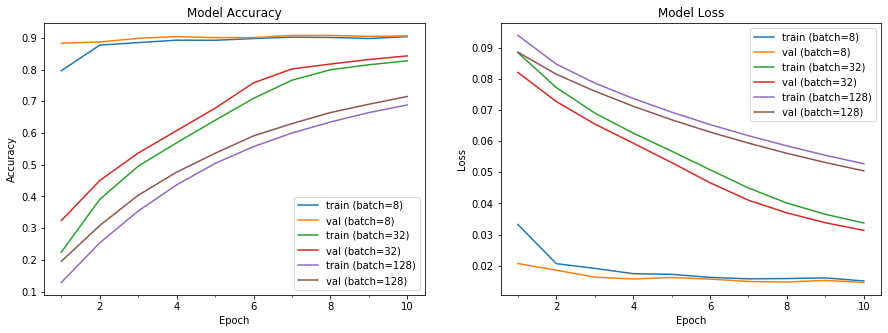

Accuracy on test data is: 0.90 (batch=8)
Accuracy on test data is: 0.84 (batch=32)
Accuracy on test data is: 0.71 (batch=128)


In [11]:
'''
Vary the batch size
'''
# decrease the batch size
# define model
model_d = simple_nn()
model_d.compile(optimizer=sgd, loss='mse', metrics=['acc'])
# train the model
print("\nFit with batch_size=8")
%time model_info_d = model_d.fit(train_features, train_labels, batch_size=8, \
                       epochs=10, verbose=0, validation_split=0.2)

# increase the batch size
# define model
model_i = simple_nn()
# define optimizer
sgd = SGD(lr=0.01)
model_i.compile(optimizer=sgd, loss='mse', metrics=['acc'])
# train the model
print("Fit with batch_size=128")
%time model_info_i = model_i.fit(train_features, train_labels, batch_size=128, \
                       epochs=10, verbose=0, validation_split=0.2)

# plot model history
plot_model_history([model_info_d, model_info_sgd, model_info_i], ["batch=8", "batch=32", "batch=128"])
# compute test accuracy
accuracy(test_features, test_labels, [model_d, model_sgd, model_i], ["batch=8", "batch=32", "batch=128"])

### Observation:

Increasing the batch size decreases the training time but reduces the rate of learning.

## Change cost function

CPU times: user 31 s, sys: 6.17 s, total: 37.2 s
Wall time: 14.5 s


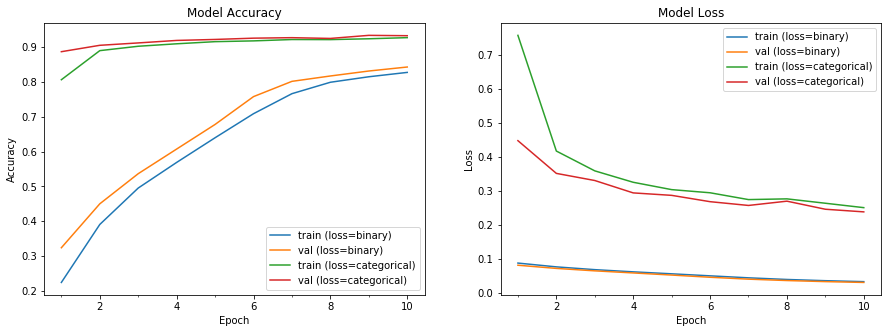

Accuracy on test data is: 0.84 (loss=binary)
Accuracy on test data is: 0.93 (loss=categorical)


In [12]:
'''
Change the Cost Function to Categorical Crossentropy
'''
# define model
model_cc = simple_nn()
sgd = SGD(lr=0.01)
model_cc.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['acc'])
# train the model
%time model_info_cc = model_cc.fit(train_features, train_labels, \
                       epochs=10, verbose=0, validation_split=0.2)

# plot model history
plot_model_history([model_info_sgd, model_info_cc], ["loss=binary", "loss=categorical"])
# compute test accuracy
accuracy(test_features, test_labels, [model_sgd, model_cc], ["loss=binary", "loss=categorical"])

### Observation:

Changing the cost function to categorical crossentropy reduced the training time. 

## Evolves the number of epochs

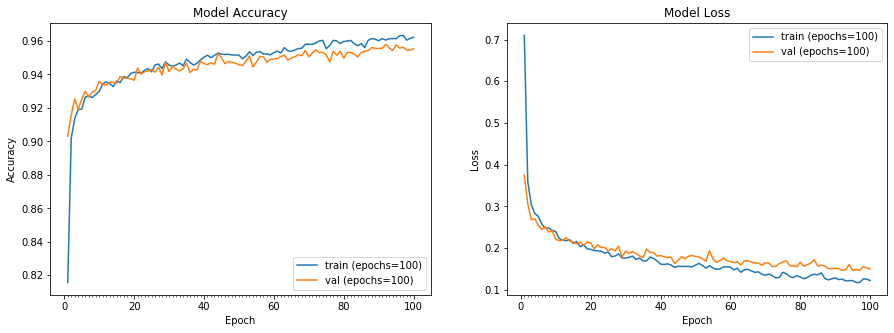

Accuracy on test data is: 0.95 (epochs=100)


In [13]:
'''
Increase the number of epochs
'''
# define model
model = simple_nn()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
# train the model
model_info = model.fit(train_features, train_labels, batch_size=128, \
                       epochs=100, verbose=0, validation_split=0.2)

# plot model history
plot_model_history([model_info], ["epochs=100"])
# compute test accuracy
accuracy(test_features, test_labels, [model], ["epochs=100"])

### Observation:

As the number of epochs increase, more information is learned. The training as well as validation accuracy increases and then stabilizes.